In [2]:
!pip install plotnine

In [1]:
##download packages
import plotnine as p9
import pandas as pd
import seaborn as sns

## Import Dataset

In [2]:
## import and read dataset
honey = pd.read_csv("US_honey.csv")
## drop entries that don't contain data
honey = honey.dropna()
honey.head(10)

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995
5,5,Florida,230000,86,19780000,1780000,63.0,12461000,1995
6,6,Georgia,70000,62,4340000,260000,69.0,2995000,1995
7,7,Hawaii,8000,129,1032000,103000,55.0,568000,1995
8,8,Idaho,125000,48,6000000,1020000,65.0,3900000,1995
9,9,Illinois,11000,74,814000,212000,102.0,830000,1995


### Do honeybees produce less honey per colony today?

In [5]:
## calculate the average yield per colony by year
honey['mean.yield'] = honey.groupby('year')['yield_per_colony'].transform('mean')
honey.head(10)

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,mean.year,mean.yield
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995,66.909091,66.909091
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995,66.909091,66.909091
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995,66.909091,66.909091
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995,66.909091,66.909091
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995,66.909091,66.909091
5,5,Florida,230000,86,19780000,1780000,63.0,12461000,1995,66.909091,66.909091
6,6,Georgia,70000,62,4340000,260000,69.0,2995000,1995,66.909091,66.909091
7,7,Hawaii,8000,129,1032000,103000,55.0,568000,1995,66.909091,66.909091
8,8,Idaho,125000,48,6000000,1020000,65.0,3900000,1995,66.909091,66.909091
9,9,Illinois,11000,74,814000,212000,102.0,830000,1995,66.909091,66.909091


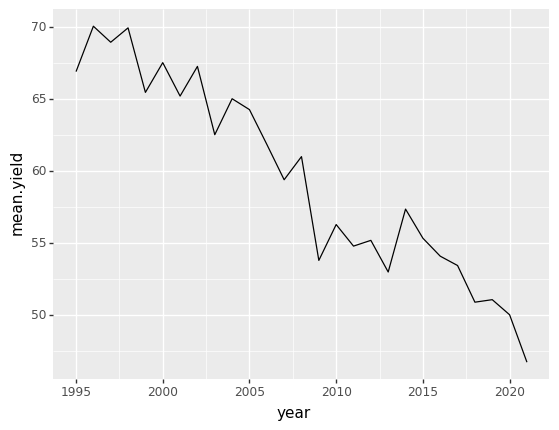

<ggplot: (8782265502172)>

In [6]:
## draw plot
from plotnine import ggplot, aes, geom_line

ggplot(honey) + aes(x="year",y='mean.yield') + geom_line()

##### The yield per colony has decreased drastically as time has gone on. The yield per colony today is less than 20, wen it used to be more than 65. 

### Which states produce the most honey?


In [78]:
### calculate the mean production by state
honey['mean.production.state'] = honey.groupby('state')['production'].transform('mean')
honey = honey.sort_values(by = 'mean.production.state', ascending= False)
honey.head(10)

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,mean.year,mean.production.state
1020,1020,NorthDakota,520000,65,6422000,6422000,1.43,48334000,2019,51.050000,1.902748e+07
662,662,NorthDakota,510000,91,12995000,12995000,150.00,69615000,2010,56.275000,1.902748e+07
202,202,NorthDakota,255000,105,26775000,8836000,59.00,15797000,1999,65.465116,1.902748e+07
820,820,NorthDakota,490000,86,9271000,9271000,199.00,83859000,2014,57.350000,1.902748e+07
900,900,NorthDakota,485000,78,6809000,6809000,185.00,69986000,2016,54.075000,1.902748e+07
28,28,NorthDakota,220000,108,23760000,3802000,63.00,14969000,1995,66.909091,1.902748e+07
245,245,NorthDakota,290000,115,33350000,13340000,56.00,18676000,2000,67.534884,1.902748e+07
781,781,NorthDakota,480000,69,6955000,6955000,204.00,67565000,2013,52.974359,1.902748e+07
159,159,NorthDakota,230000,128,29440000,8832000,63.00,18547000,1998,69.953488,1.902748e+07
742,742,NorthDakota,480000,69,5962000,5962000,192.00,63590000,2012,55.175000,1.902748e+07


In [79]:
## find the states with the highest production
state_production = honey[['state','mean.production.state']]
state_production.head(10)
state_production.drop_duplicates()


,state,mean.production.state
1020,NorthDakota,1.902748e+07
878,California,1.569911e+07
544,SouthDakota,1.317504e+07
800,Florida,1.040496e+07
895,Montana,7.302704e+06
892,Minnesota,6.540037e+06
423,Texas,4.794111e+06
772,Michigan,3.743074e+06
793,Wisconsin,3.700333e+06
268,Idaho,3.229185e+06


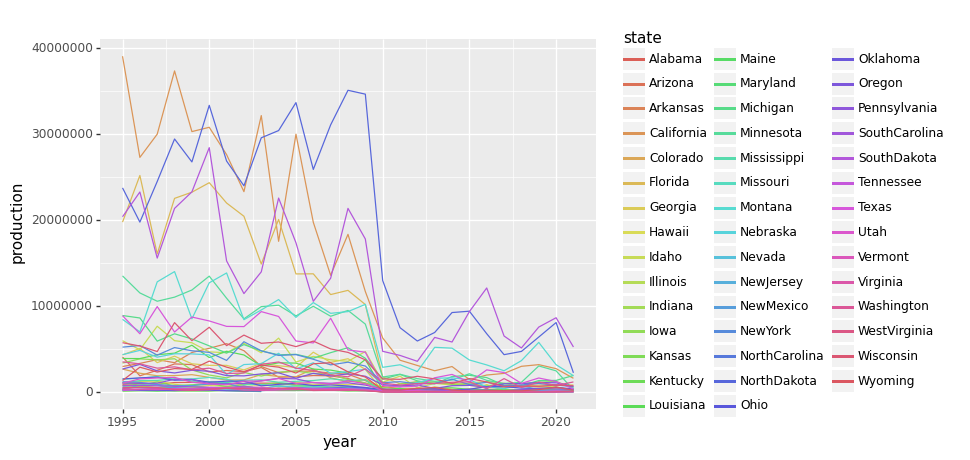

<ggplot: (8769669063605)>

In [48]:
## create plot
from plotnine import ggplot, aes, geom_line

ggplot(honey) + aes(x="year",y='production',color = 'state') + geom_line()

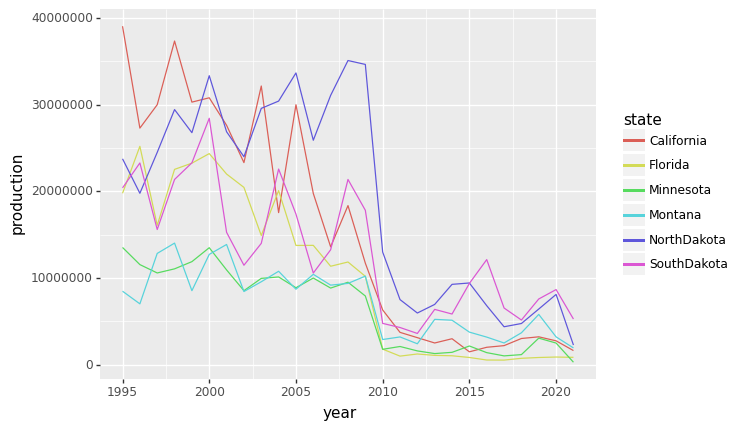

<ggplot: (8769687352564)>

In [89]:
## because the above graph is hard to decipher, create a new dataset with the top six states
list_=['NorthDakota','California','SouthDakota','Florida','Montana','Minnesota']
top_six = honey.loc[honey['state'].isin(list_)]

#recreate plot
from plotnine import ggplot, aes, geom_line

ggplot(top_six) + aes(x="year",y='production',color = 'state') + geom_line()

##### Currently, the state with the highest production is south dakota. These six states have consistently had the highest production. 

### What is the distribution in the number of colonies at sights in the top 6 beekeeping states?

In [12]:
## import geom_point()
from plotnine import ggplot, aes, geom_point

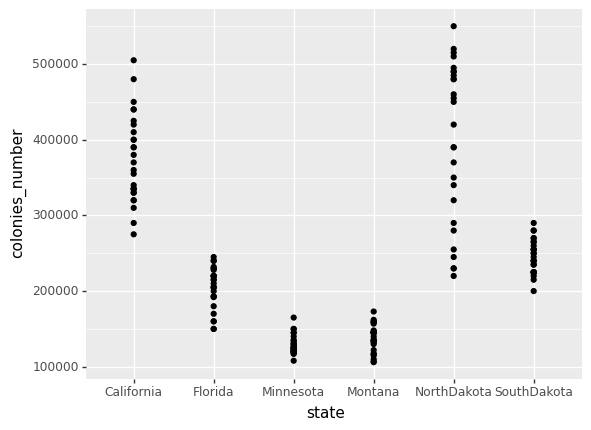

<ggplot: (8782293936628)>

In [14]:
## because the above graph is hard to decipher, create a new dataset with the top six states
list_=['NorthDakota','California','SouthDakota','Florida','Montana','Minnesota']
top_six = honey.loc[honey['state'].isin(list_)]

#recreate plot
from plotnine import ggplot, aes, geom_line

ggplot(top_six) + aes(x="state",y='colonies_number') + geom_point()

##### North Dakota has the greatest distribution in the number of colonies at various locations in the state. California also has a broader distribution in colony size. 

### How has the price of honey changed over time?

In [30]:
## calculate the mean price by year
honey['mean.price'] = honey.groupby('year')['average_price'].transform('mean')
honey.head(10)

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,mean.year,mean.production.state,mean.average_price,mean.price
28,28,NorthDakota,220000,108,23760000,3802000,63.00,14969000,1995,66.909091,1.902748e+07,74.840909,74.840909
1100,1100,NorthDakota,515000,55,2266000,2266000,2.19,62032000,2021,46.700000,1.902748e+07,3.334250,3.334250
288,288,NorthDakota,280000,96,26880000,9408000,65.00,17472000,2001,65.209302,1.902748e+07,88.465116,88.465116
499,499,NorthDakota,350000,74,25900000,7770000,90.00,23310000,2006,61.853659,1.902748e+07,134.341463,134.341463
331,331,NorthDakota,320000,75,24000000,8160000,142.00,34080000,2002,67.272727,1.902748e+07,133.204545,133.204545
860,860,NorthDakota,490000,74,9428000,9428000,180.00,65268000,2015,55.325000,1.902748e+07,292.625000,292.625000
375,375,NorthDakota,340000,87,29580000,6803000,136.00,40229000,2003,62.522727,1.902748e+07,151.068182,151.068182
458,458,NorthDakota,370000,91,33670000,8418000,81.00,27273000,2005,64.268293,1.902748e+07,116.341463,116.341463
72,72,NorthDakota,230000,86,19780000,4945000,90.00,17802000,1996,70.068182,1.902748e+07,99.568182,99.568182
820,820,NorthDakota,490000,86,9271000,9271000,199.00,83859000,2014,57.350000,1.902748e+07,282.025000,282.025000


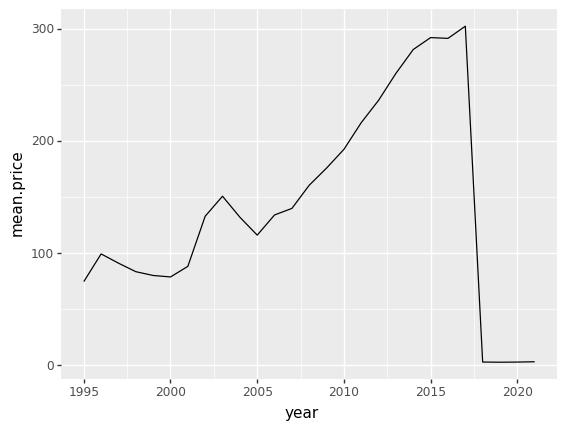

<ggplot: (8769696300698)>

In [31]:
# create plot
from plotnine import ggplot, aes, geom_line

ggplot(honey) + aes(x="year",y='mean.price') + geom_line()

##### The price of honey has (almost exponentially) increased throughout time. 

### How has the total production changed?

In [33]:
honey['mean.production'] = honey.groupby('year')['production'].transform('mean')
honey.head(10)

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,mean.year,mean.production.state,mean.average_price,mean.price,mean.production
28,28,NorthDakota,220000,108,23760000,3802000,63.00,14969000,1995,66.909091,1.902748e+07,74.840909,74.840909,4.778909e+06
1100,1100,NorthDakota,515000,55,2266000,2266000,2.19,62032000,2021,46.700000,1.902748e+07,3.334250,3.334250,5.796750e+05
288,288,NorthDakota,280000,96,26880000,9408000,65.00,17472000,2001,65.209302,1.902748e+07,88.465116,88.465116,4.311698e+06
499,499,NorthDakota,350000,74,25900000,7770000,90.00,23310000,2006,61.853659,1.902748e+07,134.341463,134.341463,3.759024e+06
331,331,NorthDakota,320000,75,24000000,8160000,142.00,34080000,2002,67.272727,1.902748e+07,133.204545,133.204545,3.880273e+06
860,860,NorthDakota,490000,74,9428000,9428000,180.00,65268000,2015,55.325000,1.902748e+07,292.625000,292.625000,1.045800e+06
375,375,NorthDakota,340000,87,29580000,6803000,136.00,40229000,2003,62.522727,1.902748e+07,151.068182,151.068182,4.107750e+06
458,458,NorthDakota,370000,91,33670000,8418000,81.00,27273000,2005,64.268293,1.902748e+07,116.341463,116.341463,4.240415e+06
72,72,NorthDakota,230000,86,19780000,4945000,90.00,17802000,1996,70.068182,1.902748e+07,99.568182,99.568182,4.499886e+06
820,820,NorthDakota,490000,86,9271000,9271000,199.00,83859000,2014,57.350000,1.902748e+07,282.025000,282.025000,1.024750e+06


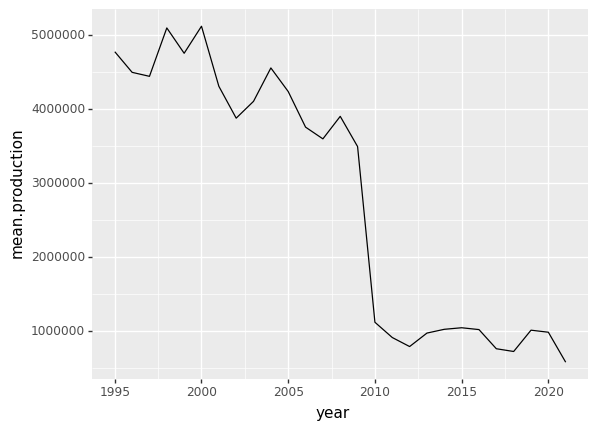

<ggplot: (8769709020868)>

In [34]:
from plotnine import ggplot, aes, geom_line

ggplot(honey) + aes(x="year",y='mean.production') + geom_line()

##### In 2006, the production dropped drastically. Since then, production has stayed the same but stayed much lower than previously. This data is consistent with the phenomonen known as the colony collapse disorder, which happened in 2006, where there was a drastic decrease in the health and number of bees. 

### How many colonies are there now?

In [36]:
honey['mean.numbercolonies'] = honey.groupby('year')['colonies_number'].transform('mean')
honey.head(10)

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,mean.year,mean.production.state,mean.average_price,mean.price,mean.production,mean.numbercolonies
28,28,NorthDakota,220000,108,23760000,3802000,63.00,14969000,1995,66.909091,1.902748e+07,74.840909,74.840909,4.778909e+06,59977.272727
1100,1100,NorthDakota,515000,55,2266000,2266000,2.19,62032000,2021,46.700000,1.902748e+07,3.334250,3.334250,5.796750e+05,66700.000000
288,288,NorthDakota,280000,96,26880000,9408000,65.00,17472000,2001,65.209302,1.902748e+07,88.465116,88.465116,4.311698e+06,58139.534884
499,499,NorthDakota,350000,74,25900000,7770000,90.00,23310000,2006,61.853659,1.902748e+07,134.341463,134.341463,3.759024e+06,57926.829268
331,331,NorthDakota,320000,75,24000000,8160000,142.00,34080000,2002,67.272727,1.902748e+07,133.204545,133.204545,3.880273e+06,57181.818182
860,860,NorthDakota,490000,74,9428000,9428000,180.00,65268000,2015,55.325000,1.902748e+07,292.625000,292.625000,1.045800e+06,65750.000000
375,375,NorthDakota,340000,87,29580000,6803000,136.00,40229000,2003,62.522727,1.902748e+07,151.068182,151.068182,4.107750e+06,58681.818182
458,458,NorthDakota,370000,91,33670000,8418000,81.00,27273000,2005,64.268293,1.902748e+07,116.341463,116.341463,4.240415e+06,58341.463415
72,72,NorthDakota,230000,86,19780000,4945000,90.00,17802000,1996,70.068182,1.902748e+07,99.568182,99.568182,4.499886e+06,58181.818182
820,820,NorthDakota,490000,86,9271000,9271000,199.00,83859000,2014,57.350000,1.902748e+07,282.025000,282.025000,1.024750e+06,67725.000000


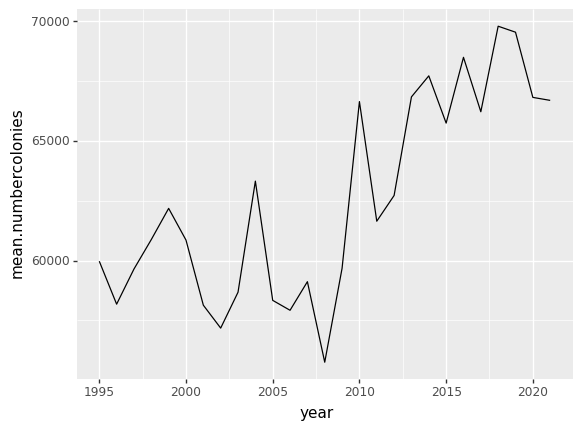

<ggplot: (8769709363993)>

In [37]:
from plotnine import ggplot, aes, geom_line

ggplot(honey) + aes(x="year",y='mean.numbercolonies') + geom_line()

##### the number of colonies is steadily rising, even as population numbers decrease. This is likely because more colonies are needed to keep up with demand. 

### How has the value of production changed over time?

In [9]:
## calculate the mean value of production per year
honey['mean.value_of_production'] = honey.groupby('year')['value_of_production'].transform('mean')
honey.head(10)

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,mean.year,mean.yield,mean.value_of_production
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995,66.909091,66.909091,3121000.0
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995,66.909091,66.909091,3121000.0
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995,66.909091,66.909091,3121000.0
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995,66.909091,66.909091,3121000.0
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995,66.909091,66.909091,3121000.0
5,5,Florida,230000,86,19780000,1780000,63.0,12461000,1995,66.909091,66.909091,3121000.0
6,6,Georgia,70000,62,4340000,260000,69.0,2995000,1995,66.909091,66.909091,3121000.0
7,7,Hawaii,8000,129,1032000,103000,55.0,568000,1995,66.909091,66.909091,3121000.0
8,8,Idaho,125000,48,6000000,1020000,65.0,3900000,1995,66.909091,66.909091,3121000.0
9,9,Illinois,11000,74,814000,212000,102.0,830000,1995,66.909091,66.909091,3121000.0


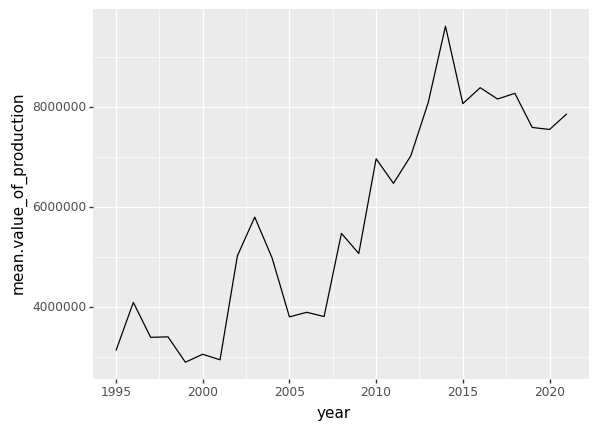

<ggplot: (8782312270126)>

In [10]:
from plotnine import ggplot, aes, geom_line

ggplot(honey) + aes(x="year",y='mean.value_of_production') + geom_line()

##### the value of production has gone up until around 2013, but has seemed to decrease since then. 

### In which states, is production increasing since the crisis in 2006?

In [45]:
# convert the 'Date' column to datetime format
##honey['year'] = pd.to_datetime(honey['year'], format='%Y')
honey.info()
honey.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1115 non-null   int64         
 1   state                     1115 non-null   object        
 2   colonies_number           1115 non-null   int64         
 3   yield_per_colony          1115 non-null   int64         
 4   production                1115 non-null   int64         
 5   stocks                    1115 non-null   int64         
 6   average_price             1115 non-null   float64       
 7   value_of_production       1115 non-null   int64         
 8   year                      1115 non-null   datetime64[ns]
 9   mean.year                 1115 non-null   float64       
 10  mean.yield                1115 non-null   float64       
 11  mean.value_of_production  1115 non-null   float64       
dtypes: datetime64[ns](1)

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,mean.year,mean.yield,mean.value_of_production
0,0,Alabama,16000,58,928000,28000,62.0,575000,1970-01-01 00:00:00.000001995,66.909091,66.909091,3121000.0
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1970-01-01 00:00:00.000001995,66.909091,66.909091,3121000.0
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1970-01-01 00:00:00.000001995,66.909091,66.909091,3121000.0
3,3,California,420000,93,39060000,4687000,60.0,23436000,1970-01-01 00:00:00.000001995,66.909091,66.909091,3121000.0
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1970-01-01 00:00:00.000001995,66.909091,66.909091,3121000.0
5,5,Florida,230000,86,19780000,1780000,63.0,12461000,1970-01-01 00:00:00.000001995,66.909091,66.909091,3121000.0
6,6,Georgia,70000,62,4340000,260000,69.0,2995000,1970-01-01 00:00:00.000001995,66.909091,66.909091,3121000.0
7,7,Hawaii,8000,129,1032000,103000,55.0,568000,1970-01-01 00:00:00.000001995,66.909091,66.909091,3121000.0
8,8,Idaho,125000,48,6000000,1020000,65.0,3900000,1970-01-01 00:00:00.000001995,66.909091,66.909091,3121000.0
9,9,Illinois,11000,74,814000,212000,102.0,830000,1970-01-01 00:00:00.000001995,66.909091,66.909091,3121000.0


In [44]:
filtered_honey = honey.loc[(honey['year'] >= '2006-01-01')]
filtered_honey.head(10)

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,mean.year,mean.yield,mean.value_of_production


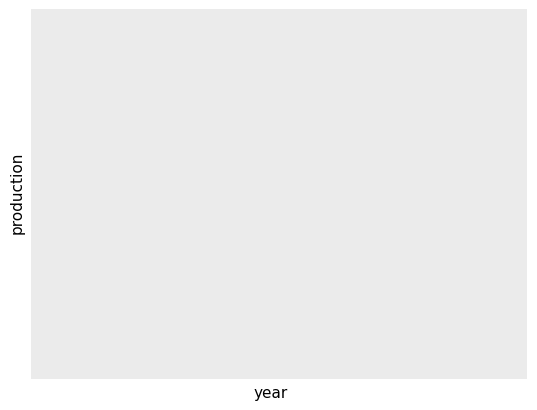

<ggplot: (8782243747094)>

In [33]:
## create plot
from plotnine import ggplot, aes, geom_line

ggplot(filtered_honey) + aes(x="year",y='production',color = 'state') + geom_line()